# Exercicio 1:

Criar um programa que abra 2 bandas armazenadas em arquivos
GeoTiff (usar como teste as imagens individuais fornecidas em
aula, também disponíveis na wiki  crop_1_band_5 e
crop_1_band_7, ou crop_2_band_5 e crop_2_band_7) e crie uma matriz
NumPy com 3 dimensões, colocando em cada dimensão os
seguintes dados:
a. Dimensão 1  crop_1_band_5
b. Dimensão 2  crop_1_band_7
c. Dimensão 3  ndvi_crop_1
A seguir visualizar a matriz como uma imagem com 3 bandas,
usando matplotlib

In [1]:
import numpy as np

from osgeo import gdal

from osgeo import osr

from gdalconst import *

import matplotlib.colors as colors

import matplotlib.mlab as mlab

import matplotlib.patches as mpatches

import sys

import matplotlib.pyplot as plt

In [2]:
gdal.UseExceptions()

In [3]:
try:
    #criar o dataset (filename) abrindo o arquivo para leitura (GA_ReadOnly)
    filename_crop_1_banda_5 = r"C:\Users\Philipe Leal\Python\dados_gdal_numpy\crop-1-band-5.tif"
    dataset_filename_crop_1_banda_5 = gdal.Open(filename_crop_1_banda_5, GA_ReadOnly)
    print(dataset_filename_crop_1_banda_5.GetGeoTransform())
    
    filename_crop_1_banda_7 = r"C:\Users\Philipe Leal\Python\dados_gdal_numpy\crop-1-band-7.tif"
    dataset_filename_crop_1_banda_7 = gdal.Open(filename_crop_1_banda_7, GA_ReadOnly)
    print(dataset_filename_crop_1_banda_7.GetGeoTransform())
    
except RuntimeError, e:
    print(e)
    sys.exit("Erro na abertura do arquivo")
    pass

(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)
(583540.0, 2.0, 0.0, 7507374.0, 0.0, -2.0)


In [4]:
#Verificar se os rasters são da mesma região, ou não:

print (dataset_filename_crop_1_banda_5.GetGeoTransform() == dataset_filename_crop_1_banda_7.GetGeoTransform())

True


In [5]:
#Verificar se os sistemas de coordenadas são iguais:
print(dataset_filename_crop_1_banda_5.GetProjectionRef() == dataset_filename_crop_1_banda_7.GetProjectionRef())

True


In [6]:
#Verificar se o numero de bandas por imagem é igual: 

if dataset_filename_crop_1_banda_5.RasterCount == dataset_filename_crop_1_banda_7.RasterCount:
    print ("OK. Numero de bandas por imagem eh igual")
    
else:
    print ("Problema")

OK. Numero de bandas por imagem eh igual


In [7]:
# Atribuindo cada banda de cada imagem a uma variável tipo lista

crop_1_banda_5 = dataset_filename_crop_1_banda_5.GetRasterBand(1)


crop_1_banda_7 = dataset_filename_crop_1_banda_7.GetRasterBand(1)

In [8]:
#transformando as listas em array

numpy_crop_1_banda_5 = crop_1_banda_5.ReadAsArray()
numpy_crop_1_banda_7 = crop_1_banda_7.ReadAsArray()

print(numpy_crop_1_banda_5.shape)
print(numpy_crop_1_banda_7.shape)

(400L, 400L)
(400L, 400L)


In [9]:
NDVI_crop1_5_7 = ((numpy_crop_1_banda_7.astype(float)-numpy_crop_1_banda_5.astype(float))/ (numpy_crop_1_banda_5.astype(float) + numpy_crop_1_banda_7.astype(float)))

print(NDVI_crop1_5_7.shape)

(400L, 400L)


In [10]:
print(NDVI_crop1_5_7.max())
print(NDVI_crop1_5_7.min())

0.997412677878
-0.992537313433


In [11]:
Lista_arrays = ([numpy_crop_1_banda_5.astype(float)], [numpy_crop_1_banda_7.astype(float)], [NDVI_crop1_5_7])

Array_arrays = np.asarray(Lista_arrays)

Array_arrays = np.sum(Array_arrays, axis =1)

Array_arrays.shape

(3L, 400L, 400L)

In [12]:
print("Banda 5 = {0}".format(Array_arrays[0]))
print("")
print("Banda 7 = {0}".format(Array_arrays[1]))
print("")
print("NDVI = {0}".format(Array_arrays[2]))



Banda 5 = [[ 136.   24.   53. ...,  378.  209.  136.]
 [  71.  161.  224. ...,  292.  152.  146.]
 [ 231.  297.  282. ...,  172.  111.  150.]
 ..., 
 [ 132.  286.  289. ...,   55.   98.  115.]
 [ 126.  211.  258. ...,   28.   61.   99.]
 [ 239.  239.  245. ...,   58.   64.   61.]]

Banda 7 = [[ 198.   53.   46. ...,  479.  235.  161.]
 [  67.  163.  315. ...,  405.  208.  174.]
 [ 328.  403.  371. ...,  166.  136.  211.]
 ..., 
 [ 188.  352.  381. ...,  106.  189.  183.]
 [ 175.  295.  336. ...,   65.  100.  212.]
 [ 323.  319.  354. ...,   60.   89.   77.]]

NDVI = [[ 0.18562874  0.37662338 -0.07070707 ...,  0.11785298  0.05855856
   0.08417508]
 [-0.02898551  0.00617284  0.16883117 ...,  0.16212339  0.15555556  0.0875    ]
 [ 0.17352415  0.15142857  0.13629403 ..., -0.01775148  0.10121457
   0.16897507]
 ..., 
 [ 0.175       0.10344828  0.13731343 ...,  0.31677019  0.31707317
   0.22818792]
 [ 0.1627907   0.16600791  0.13131313 ...,  0.39784946  0.24223602
   0.36334405]
 [ 0.1494661

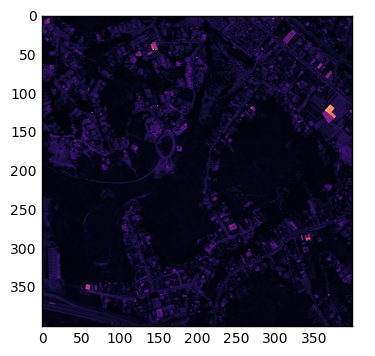

In [13]:
plt.imshow(Array_arrays[0], "magma")
plt.show()

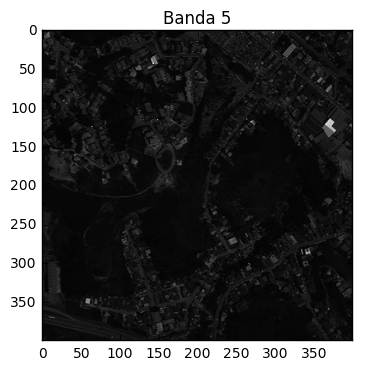

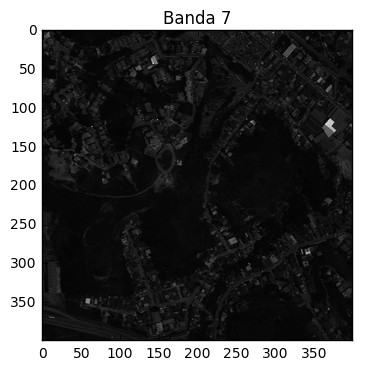

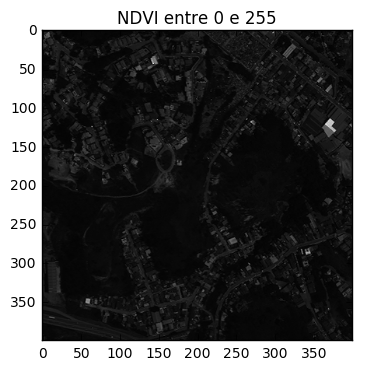

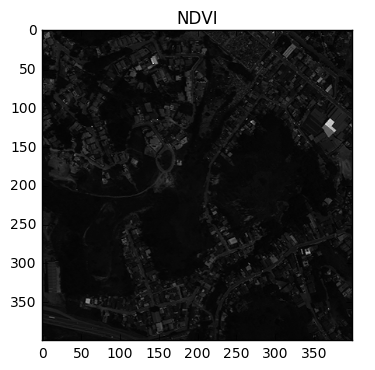

In [14]:
plt.imshow((Array_arrays[0]), "gray")
plt.title("Banda 5")
plt.show()

plt.imshow((Array_arrays[0]), "gray")
plt.title("Banda 7")
plt.show()

plt.imshow(((Array_arrays[0]*1250.) + 125.0).astype(int), "gray")
plt.title("NDVI entre 0 e 255")
plt.show()

plt.imshow(Array_arrays[0], "gray")
plt.title("NDVI")

plt.show()

# Exercicio 2

Com base na imagem da Dimensão 3 do exercício anterior,
perguntar um valor de limiar (entre -1 e +1) para o usuário.
Verificar se o limiar informado está correto, e a seguir aplicar
sobre a matriz da Dimensão 3 (índice de vegetação calculado),
gerando uma matriz de elementos (acima ou abaixo do limiar), a
qual pode ser chamada de máscara. Por fim, visualizar a máscara
como uma imagem, usando matplotlib.

In [1]:
Limiar = ()

while Limiar > 1 or Limiar <-1:
    Limiar = input("Defina um limiar entre -1 e 1 = ")
    print("Digite novamente um limiar entre -1 e 1")

print("Limiar selecionado = {0}".format(Limiar))

TypeError: '>' not supported between instances of 'tuple' and 'int'

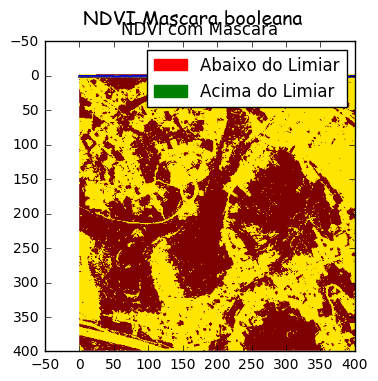

In [35]:
plt.figure(1)
plt.suptitle("NDVI Mascara booleana", fontname = "Fantasy", fontsize = 14)
plt.plot(np.where(Array_arrays[2]>=Limiar, 1, 0))
     
plt.show()

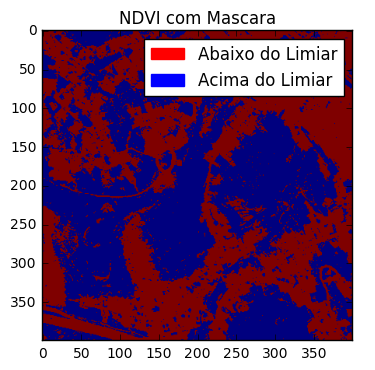

In [38]:
#Professor, observacao: ainda nao consegui inserir as cores que eu queria para cada classe da figura. Apenas consegui atribuir as cores aos labels da figura.

plt.imshow(Array_mask_1, vmin = (-1), vmax = Limiar)
plt.title("NDVI com Mascara")

x = (Array_arrays[2])>=Limiar
y = (Array_arrays[2])<Limiar

red_patch = mpatches.Patch(color='red', label='Abaixo do Limiar')
green_patch = mpatches.Patch(color='blue', label='Acima do Limiar')

color_patches = [red_patch, green_patch]
plt.legend(handles=color_patches)


plt.imshow(x, cmap= "magma")
plt.imshow(y)

plt.show()

# Exercicio 3: 
Com base nos resultados dos exercícios 1 e 2, criar uma matriz
NumPy com 3 dimensões (exercício 1), onde apenas pixels acima
do limiar informado (exercício 2) serão mostrados na
visualização pelo matplotlib. Os demais devem receber valor 0.

In [ ]:
Array_arrays_nan = np.where(Array_arrays<Limiar, np.nan, Array_arrays)

plt.imshow(Array_arrays_nan[2][0])
plt.show()